# Student Performance Indicator

Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collecetion 
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model 

1) Problem statement

- This project understands how the students performance (test scores) is affected by other variables such as Gender, Ethnicity,parental level of education , Lunch and Test preparation course.

2) Data Collection

- Dataset Source -https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

- The data consists of 8 column and  1000  rows 

2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the Data as Pandas DataFrame

In [4]:
df = pd.read_csv('Stud.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

# 2.2 Dataset information

- gender : gender of students ->(Male/female)
- race/ethnicity of students -> (Group A,B,C,D,E)
- parental level of education : parents final education ->(bachelor's degree,some collage, master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test prepration cource : complete or not complete before test
- math score
- reading score
- writing score

3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical column

3.1 Check Missing values

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the data set

3.2 Check Duplicates

In [10]:
df.duplicated().sum()

0

There are no missing values and no duplicates in the dataset.

3.3 Check data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5 Check statistics of the data set

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insight

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- while there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

3.7 Exploring Data 

In [14]:
print("categorical in 'gender' variable: ", end = " ")
print(df['gender'].unique())

categorical in 'gender' variable:  ['female' 'male']


In [15]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [17]:
print("categorical in 'gender' variable: ", end = " ")
print(df['race/ethnicity'].unique())

print("categorical in 'gender' variable: ", end = " ")
print(df['parental level of education'].unique())

print("categorical in 'gender' variable: ", end = " ")
print(df['lunch'].unique())

print("categorical in 'gender' variable: ", end = " ")
print(df['test preparation course'].unique())

categorical in 'gender' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categorical in 'gender' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categorical in 'gender' variable:  ['standard' 'free/reduced']
categorical in 'gender' variable:  ['none' 'completed']


In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

#print columns

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\n we have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

 we have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 Adding columns for "Total Score" and "Average"

In [19]:
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total_score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()
print(f"Number of students full marks  in Maths:{math_full}")
print(f"Number of students full marks  in Reading:{reading_full}")
print(f"Number of students full marks  in Writing:{writing_full}")

Number of students full marks  in Maths:7
Number of students full marks  in Reading:17
Number of students full marks  in Writing:14


In [23]:
reading_less_20 = df[df['reading score'] < 20]['average'].count()
writing_less_20 = df[df['writing score'] < 20]['average'].count()
math_less_20 = df[df['math score'] < 20]['average'].count()

print(f"Number of students less than 20 marks in Maths:{math_less_20}")
print(f"Number of students less than 20 marks in Reading:{reading_less_20}")
print(f"Number of students less than 20 marks in Writing:{writing_less_20}")

Number of students less than 20 marks in Maths:4
Number of students less than 20 marks in Reading:1
Number of students less than 20 marks in Writing:3


Insights

- From above value we get students have performed the worst in Maths
- Best performance in reading section

4. Exploring Data (Visualization)

4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)

4.1.1 Histogram & KDE

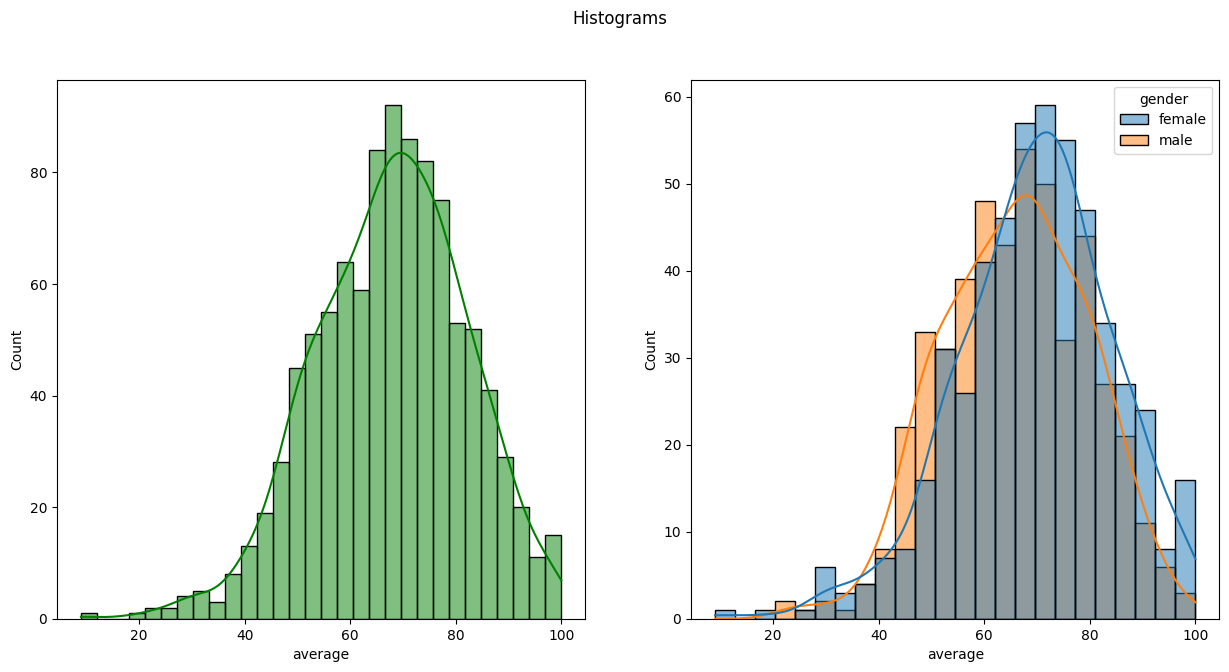

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Histograms')
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
plt.show()